<a href="https://colab.research.google.com/github/Thorne-Musau/flasktrial/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custommer segmentation analysis

In this notebook, we will use the ***mall_customers*** dataset to use unsupervised and supervised lelarning techniques to build a model that can be used to predict customer groupings

### Library and Data importation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls 'drive/My Drive/Dataset/Mall_Customers.csv'

'drive/My Drive/Dataset/Mall_Customers.csv'


In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the datasets
%time dataset = pd.read_csv('drive/My Drive/Dataset/Mall_Customers.csv')
df = dataset.copy()

CPU times: user 11.2 ms, sys: 887 µs, total: 12 ms
Wall time: 595 ms


In [5]:
# Visualizing the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#Searching if the dataset has null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Exploratory Data Analysis

We first show the distribution of annual income over the dataset

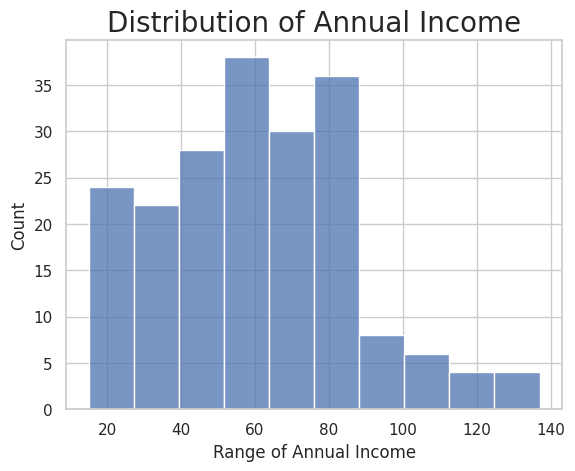

In [19]:
sns.set(style = 'whitegrid')
sns.histplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

<ipython-input-20-2c63f8f79962>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


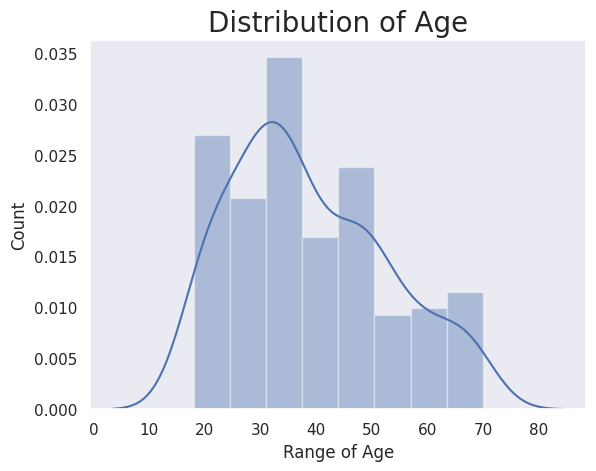

In [20]:
sns.set(style = 'dark')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

### Clustering

In [21]:
#Making  the independent variables matrices
X = df.iloc[:, [3, 4]].values

#### Elbow method

Used to efficiently find the number of clusters needed instead of randomly guessing

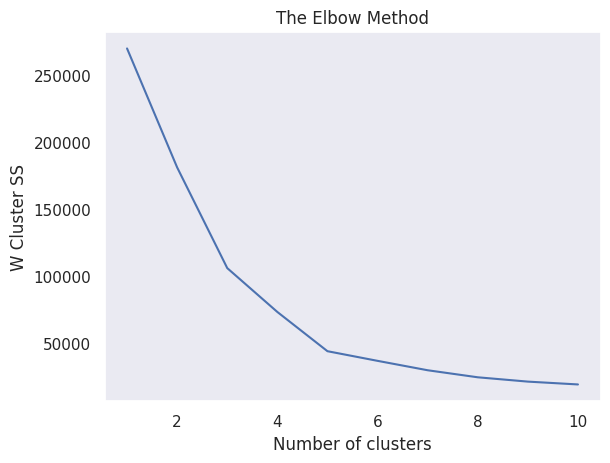

In [30]:
#Using KMeans for clustering
# Scale the features (important for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    df['Cluster'] = kmeans.fit_predict(features_scaled)





# font_title = {
#         'weight' : 'bold',
#         'size'   : 35}

# font_axes = {
#         'weight' : 'normal',
#         'size'   : 28}

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('W Cluster SS')
plt.show()

In [23]:
# #Plotting Number of Clusters Vs wcss - The Elbow Method
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method', **font_title)
# plt.xlabel('Number of clusters', **font_axes)
# plt.ylabel('W Cluster SS', **font_axes)
# plt.show()

In [24]:
# #Taking number of clusters = 5
# kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
# y_kmeans = kmeans.fit_predict(X)


In [25]:
# # PLotting the clusters
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
# plt.title('Customer Clusters', **font_title)
# plt.xlabel('Annual income', **font_axes)
# plt.ylabel('Spending', **font_axes)
# plt.legend()
# plt.show()

In [31]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = kmeans.fit_predict(features_scaled)


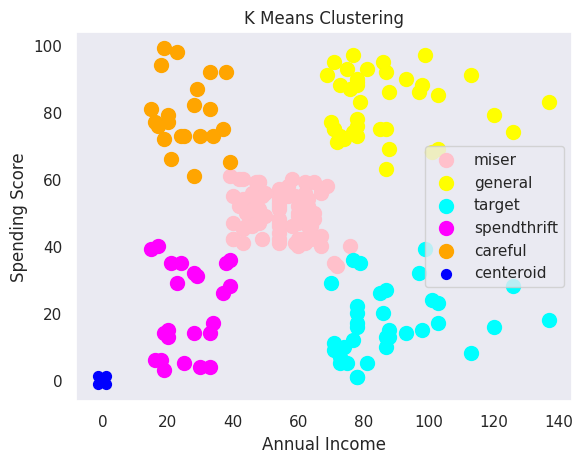

In [35]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [37]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          4  
1          1  
2          4  
3          1  
4          4

In [33]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
5             6  Female   22                  17                      76   
6             7  Female   35                  18                       6   
7             8  Female   23                  18                      94   
8             9    Male   64                  19                       3   
9            10  Female   30                  19                      72   
10           11    Male   67                  19                      14   
11           12  Female   35                  19                      99   
12          

In [35]:
# Example using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with cluster labels
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'df' is your DataFrame with cluster labels
# Assuming 'model' is your trained Logistic Regression model

# Get user input for new customer features
new_age = float(input("Enter the customer's age: "))
new_annual_income = float(input("Enter the customer's annual income (k$): "))
new_spending_score = float(input("Enter the customer's spending score (1-100): "))

# Create a DataFrame with the user input
new_customer_features = pd.DataFrame({
    'Age': [new_age],
    'Annual Income (k$)': [new_annual_income],
    'Spending Score (1-100)': [new_spending_score]
})

# Make predictions for the new customer
predicted_cluster = model.predict(new_customer_features)

# Print the predicted cluster membership
print(f'Predicted Cluster Membership: {predicted_cluster[0]}')


Enter the customer's age: 17
Enter the customer's annual income (k$): 6000
Enter the customer's spending score (1-100): 30
Predicted Cluster Membership: 2
